# **import important libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# **load dataset**

In [45]:
dataset = pd.read_csv('/content/loan_data.csv')

# **Exploratory Data Analysis**

In [46]:
dataset.iloc[3]

,3
person_age,23.0
person_gender,female
person_education,Bachelor
person_income,79753.0
person_emp_exp,0
person_home_ownership,RENT
loan_amnt,35000.0
loan_intent,MEDICAL
loan_int_rate,15.23
loan_percent_income,0.44


In [47]:
dataset['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


In [48]:
print('Dataset size: ', len(dataset))
print('Num of columns: ', len(dataset.columns))

Dataset size:  45000
Num of columns:  14


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [50]:
dataset.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [51]:
print('Number of null values in each column\n')
dataset.isnull().sum()

Number of null values in each column



,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [52]:
print('Number of duplicate values in each column: ', dataset.duplicated().sum())

Number of duplicate values in each column:  0


In [92]:
print('Number of rejected loan applicants:', dataset['loan_status'].value_counts()[0])
print('Number of accepted loan applicants:', dataset['loan_status'].value_counts()[1])

Number of rejected loan applicants: 35000
Number of accepted loan applicants: 10000


In [90]:
gender_counts = dataset['person_gender'].value_counts()
gender_df = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})

print("Number of loan applicants by gender:\n")
gender_df

Number of loan applicants by gender:



,Gender,Count
0,male,24841
1,female,20159


In [91]:
data = {
    'Income Threshold': ['> 70k', '> 1M'],
    'Count': [
        sum(dataset['person_income'] > 70000),
        sum(dataset['person_income'] > 1000000)
    ]
}

print("Number of people with income over specified thresholds:\n")
pd.DataFrame(data)

Number of people with income over specified thresholds:



,Income Threshold,Count
0,> 70k,21311
1,> 1M,24


In [85]:
data = {
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'Income Threshold': ['> 70k', '> 70k', '> 1M', '> 1M'],
    'Count': [
        len(dataset[(dataset['person_income'] > 70000) & (dataset['person_gender'] == 'female')]),
        len(dataset[(dataset['person_income'] > 70000) & (dataset['person_gender'] == 'male')]),
        len(dataset[(dataset['person_income'] > 1000000) & (dataset['person_gender'] == 'female')]),
        len(dataset[(dataset['person_income'] > 1000000) & (dataset['person_gender'] == 'male')])
    ]
}
print("Number of individuals with income over specified thresholds by gender:\n")
pd.DataFrame(data)

Number of individuals with income over specified thresholds by gender:



,Gender,Income Threshold,Count
0,Female,> 70k,9474
1,Male,> 70k,11837
2,Female,> 1M,6
3,Male,> 1M,18


In [82]:
data = {
    'Gender': ['Female', 'Female', 'Male', 'Male'],
    'Loan Status': ['Rejected', 'Approved', 'Rejected', 'Approved'],
    'Count': [
        len(dataset[(dataset['loan_status'] == 0) & (dataset['person_gender'] == 'female')]),
        len(dataset[(dataset['loan_status'] == 1) & (dataset['person_gender'] == 'female')]),
        len(dataset[(dataset['loan_status'] == 0) & (dataset['person_gender'] == 'male')]),
        len(dataset[(dataset['loan_status'] == 1) & (dataset['person_gender'] == 'male')])
    ]
}
print("Loan Approval and Rejection Counts by Gender:\n")
pd.DataFrame(data)

Loan Approval and Rejection Counts by Gender:



,Gender,Loan Status,Count
0,Female,Rejected,15674
1,Female,Approved,4485
2,Male,Rejected,19326
3,Male,Approved,5515


In [79]:
data = {
    'Gender': ['Male', 'Female'],
    'Count': [
        len(dataset[(dataset['credit_score'] < 700) & (dataset['person_gender'] == 'male')]),
        len(dataset[(dataset['credit_score'] < 700) & (dataset['person_gender'] == 'female')])
    ]
}

print("Number of individuals with credit score below 700 by gender:\n")
pd.DataFrame(data)

Number of individuals with credit score below 700 by gender:



,Gender,Count
0,Male,23242
1,Female,18884


In [74]:
data = {
    'Education Level': ['Bachelor', 'Master', 'High School', 'Associate'],
    'Count': [
        len(dataset[(dataset['credit_score'] < 600) & (dataset['person_education'] == 'Bachelor')]),
        len(dataset[(dataset['credit_score'] < 600) & (dataset['person_education'] == 'Master')]),
        len(dataset[(dataset['credit_score'] < 600) & (dataset['person_education'] == 'High School')]),
        len(dataset[(dataset['credit_score'] < 600) & (dataset['person_education'] == 'Associate')])
    ]
}

print("The count of individuals with credit score < 600 by education level is as follows:\n")
pd.DataFrame(data)

The count of individuals with credit score < 600 by education level is as follows:



,Education Level,Count
0,Bachelor,2764
1,Master,1189
2,High School,3782
3,Associate,3023


In [73]:
data = {
    'Education Level': ['Bachelor', 'Master', 'High School', 'Associate'],
    'Count': [
        len(dataset[(dataset['credit_score'] >= 600) & (dataset['person_education'] == 'Bachelor')]),
        len(dataset[(dataset['credit_score'] >= 600) & (dataset['person_education'] == 'Master')]),
        len(dataset[(dataset['credit_score'] >= 600) & (dataset['person_education'] == 'High School')]),
        len(dataset[(dataset['credit_score'] >= 600) & (dataset['person_education'] == 'Associate')])
    ]
}

print("The count of individuals with credit score > 600 by education level is as follows:\n")
pd.DataFrame(data)

The count of individuals with credit score > 600 by education level is as follows:



,Education Level,Count
0,Bachelor,10635
1,Master,5791
2,High School,8190
3,Associate,9005


In [75]:
data = {
    'Education Level': ['Bachelor', 'Bachelor', 'Associate', 'Associate', 'High School', 'High School',
                        'Master', 'Master', 'Doctorate', 'Doctorate'],
    'Loan Status': ['Approved', 'Rejected', 'Approved', 'Rejected', 'Approved', 'Rejected',
                    'Approved', 'Rejected', 'Approved', 'Rejected'],
    'Count': [
        len(dataset[(dataset['loan_status'] == 1) & (dataset['person_education'] == 'Bachelor')]),
        len(dataset[(dataset['loan_status'] == 0) & (dataset['person_education'] == 'Bachelor')]),
        len(dataset[(dataset['loan_status'] == 1) & (dataset['person_education'] == 'Associate')]),
        len(dataset[(dataset['loan_status'] == 0) & (dataset['person_education'] == 'Associate')]),
        len(dataset[(dataset['loan_status'] == 1) & (dataset['person_education'] == 'High School')]),
        len(dataset[(dataset['loan_status'] == 0) & (dataset['person_education'] == 'High School')]),
        len(dataset[(dataset['loan_status'] == 1) & (dataset['person_education'] == 'Master')]),
        len(dataset[(dataset['loan_status'] == 0) & (dataset['person_education'] == 'Master')]),
        len(dataset[(dataset['loan_status'] == 1) & (dataset['person_education'] == 'Doctorate')]),
        len(dataset[(dataset['loan_status'] == 0) & (dataset['person_education'] == 'Doctorate')])
    ]
}

print("Loan Approval and Rejection Counts by Education Level:\n")
pd.DataFrame(data)

Loan Approval and Rejection Counts by Education Level:



,Education Level,Loan Status,Count
0,Bachelor,Approved,3018
1,Bachelor,Rejected,10381
2,Associate,Approved,2650
3,Associate,Rejected,9378
4,High School,Approved,2671
5,High School,Rejected,9301
6,Master,Approved,1519
7,Master,Rejected,5461
8,Doctorate,Approved,142
9,Doctorate,Rejected,479


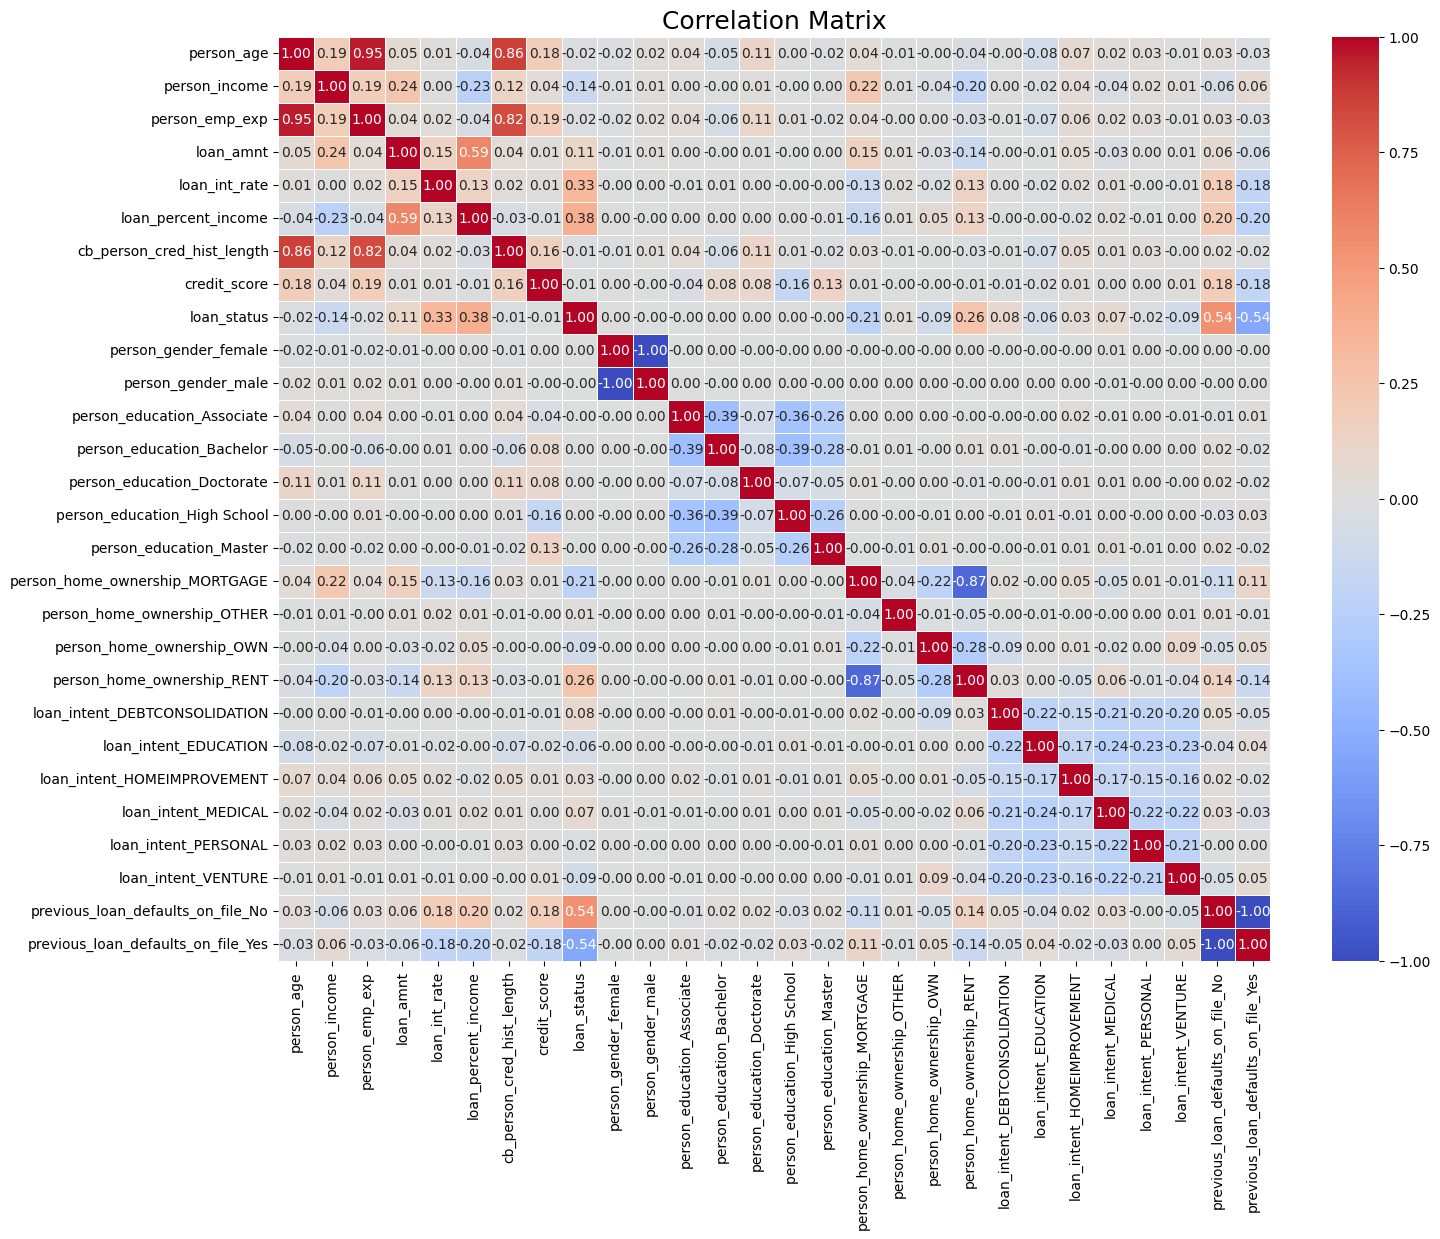

In [28]:
categorical_columns = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(dataset[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

dataset_encoded = pd.concat([dataset.drop(columns=categorical_columns), encoded_df], axis=1)

correlation_matrix = dataset_encoded.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=18)
plt.show()


# **Preprocessing**

In [32]:
def preprocess_text_columns(dataset, categorical_columns):
    dataset[categorical_columns] = dataset[categorical_columns].apply(lambda x: x.str.lower())
    return dataset

categorical_columns = [
    'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'
]

encoder = OneHotEncoder(sparse_output=False)
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)

process_text_columns = preprocess_text_columns(dataset, categorical_columns)
encoded_data = encoder.fit_transform(process_text_columns[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
columns_to_scale = categorical_columns + ['loan_status']
dataset_without_categorical_and_status = dataset.drop(columns=columns_to_scale)
scaled_data = quantile_transformer.fit_transform(dataset_without_categorical_and_status)
scaled_df = pd.DataFrame(scaled_data, columns=dataset_without_categorical_and_status.columns)
final_data = pd.concat([encoded_df, scaled_df, dataset['loan_status']], axis=1)

final_data

,person_gender_female,person_gender_male,person_education_associate,person_education_bachelor,person_education_doctorate,person_education_high school,person_education_master,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,...,previous_loan_defaults_on_file_yes,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.428482,0.117320,-5.199338,5.199338,1.644369,2.877846,-0.711981,-1.321946,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,-2.183092,-3.115192,-5.199338,-2.611712,0.143512,-0.552537,-5.199338,-2.241900,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-0.234219,-3.104622,-0.144780,-0.493553,0.624145,2.651732,-0.711981,-0.114415,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.897655,0.353624,-5.199338,5.199338,1.334066,2.651732,-5.199338,0.793602,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.523537,-0.025004,-0.641002,5.199338,1.055293,3.090203,-0.182928,-0.947580,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.186756,-0.648423,0.418371,0.957454,1.505747,1.644369,-0.711981,0.090452,1
44996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.421556,-0.042171,1.625274,0.137177,0.980588,0.214920,1.298271,-0.376283,1
44997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.016672,-0.321435,0.567211,-1.344236,-0.370006,-1.104747,1.116369,0.619578,1
44998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.513491,-1.364891,0.062770,0.611996,0.738089,2.023292,0.320290,-0.664287,1


In [27]:
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

with open('quantile_transformer.pkl', 'wb') as scaler_file:
    pickle.dump(quantile_transformer, scaler_file)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(
    final_data.drop('loan_status', axis=1),
    final_data['loan_status'], test_size=0.3,
    random_state=42
)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31500, 27)
(13500, 27)
(31500,)
(13500,)


In [25]:
class LoanClassifier:
    def __init__(self, models, param_grids=None, cv=5):
        self.models = models
        self.models_dic = {}
        self.accuracy_dic = {}
        self.param_grids = param_grids if param_grids else {}
        self.cv = cv

    def fit(self, x_train, y_train, grid_search=True):
        for model_name, model in self.models.items():
            try:
                if grid_search and model_name in self.param_grids:
                    print(f"Performing Grid Search for {model_name}...")
                    grid_search_model = GridSearchCV(model, self.param_grids[model_name], cv=self.cv, n_jobs=-1, scoring='accuracy')
                    grid_search_model.fit(x_train, y_train)
                    self.models_dic[model_name] = grid_search_model.best_estimator_
                    print(f"Best parameters for {model_name}: {grid_search_model.best_params_}")
                    print(f"Best score for {model_name}: {grid_search_model.best_score_}")

                    self.save_model(model_name, grid_search_model.best_estimator_)

                else:
                    print(f"Training {model_name} without GridSearch...")
                    model.fit(x_train, y_train)
                    self.models_dic[model_name] = model

                    self.save_model(model_name, model)

            except Exception as e:
                print(f"Error training {model_name}: {str(e)}")

    def save_model(self, model_name, model):
        model_filename = f"{model_name}_model.pkl"
        with open(model_filename, 'wb') as file:
            pickle.dump(model, file)
            print(f"Saved {model_name} model as {model_filename}")

    def evaluate(self, x_test, y_test):
        for model_name, model in self.models_dic.items():
            try:
                y_pred = model.predict(x_test)
                accuracy = accuracy_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                conf_matrix = confusion_matrix(y_test, y_pred)

                self.accuracy_dic[model_name] = {
                    'accuracy': accuracy,
                    'recall': recall,
                    'precision': precision,
                    'f1': f1,
                    'conf_matrix': conf_matrix
                }

                print(f"\nModel: {model_name}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"Recall: {recall:.4f}")
                print(f"Precision: {precision:.4f}")
                print(f"F1 Score: {f1:.4f}")
                print(f"Confusion Matrix:\n{conf_matrix}\n")

                self.plot_confusion_matrix(conf_matrix, model_name)
            except Exception as e:
                print(f"Error evaluating {model_name}: {str(e)}")

    def get_metrics(self):
        return self.accuracy_dic

    def plot_confusion_matrix(self, conf_matrix, model_name):
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
        plt.title(f"Confusion Matrix - {model_name}", fontsize=16)
        plt.xlabel('Predicted Labels', fontsize=12)
        plt.ylabel('True Labels', fontsize=12)
        plt.show()

Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.9267301587301586
Saved Random Forest model as Random Forest_model.pkl
Performing Grid Search for SVM...
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVM: 0.915015873015873
Saved SVM model as SVM_model.pkl
Performing Grid Search for KNN...
Best parameters for KNN: {'n_neighbors': 50, 'weights': 'distance'}
Best score for KNN: 0.9020317460317461
Saved KNN model as KNN_model.pkl
Performing Grid Search for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best score for Decision Tree: 0.9191111111111111
Saved Decision Tree model as Decision Tree_model.pkl

Model: Random Forest
Accuracy: 0.9263
Recall: 0.7705
Precision: 0.8837
F1 Score: 0.8232
Confusion Matrix:
[[10188   305]
 [  690  2317]]



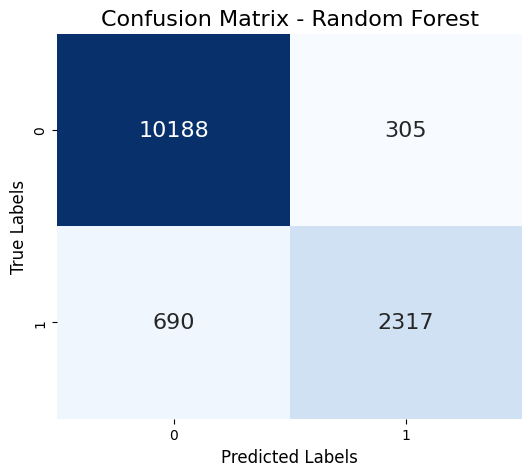


Model: SVM
Accuracy: 0.9131
Recall: 0.7632
Precision: 0.8327
F1 Score: 0.7965
Confusion Matrix:
[[10032   461]
 [  712  2295]]



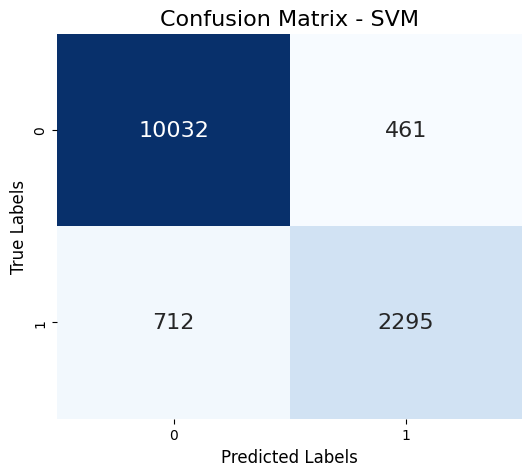


Model: KNN
Accuracy: 0.9041
Recall: 0.6867
Precision: 0.8540
F1 Score: 0.7613
Confusion Matrix:
[[10140   353]
 [  942  2065]]



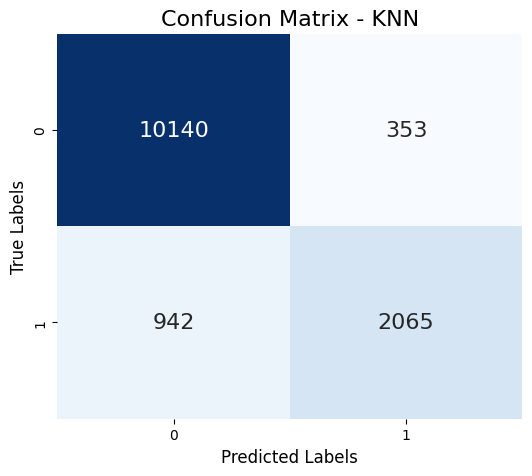


Model: Decision Tree
Accuracy: 0.9196
Recall: 0.7413
Precision: 0.8789
F1 Score: 0.8043
Confusion Matrix:
[[10186   307]
 [  778  2229]]



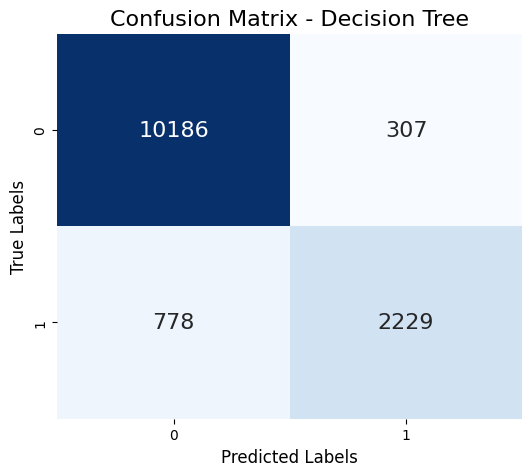

In [26]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

param_grids = {
    'Random Forest': {
        'n_estimators': [50, 70, 75, 80,  100, 120, 150, 200],
        'max_depth': [None, 10, 20, 30, 40, 50, 55, 60, 70, 80, 90, 100],
        'min_samples_split': [2, 5, 7, 10, 15]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 50],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 50, 55, 70, 85, 90, 100, 120, 200],
        'min_samples_split': [2, 5, 7, 10, 12, 15]
    },
    'GaussianNB': {}
}

loan_classifier = LoanClassifier(models=models, param_grids=param_grids, cv=5)
loan_classifier.fit(x_train, y_train)
loan_classifier.evaluate(x_test, y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Recall, Precision

def create_nn_model(input_dim):
    """
    Creates and returns a neural network model with the specified input dimension.

    Parameters:
        input_dim (int): The number of features (input dimensions).

    Returns:
        model: A compiled Keras neural network model.
    """
    model = Sequential()

    model.add(Dense(2048, input_dim=input_dim, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(2048, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])
    return model


In [ ]:
nn_model = create_nn_model(x_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = nn_model.fit(x_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_data=(x_test, y_test),
                       verbose=2)

Epoch 1/100
282/282 - 82s - 292ms/step - accuracy: 0.9036 - loss: 0.2107 - precision_6: 0.8048 - recall_6: 0.7467 - val_accuracy: 0.9142 - val_loss: 0.1965 - val_precision_6: 0.8346 - val_recall_6: 0.7682
Epoch 2/100
282/282 - 82s - 290ms/step - accuracy: 0.9149 - loss: 0.1900 - precision_6: 0.8460 - recall_6: 0.7537 - val_accuracy: 0.9129 - val_loss: 0.1939 - val_precision_6: 0.8841 - val_recall_6: 0.7020
Epoch 3/100
282/282 - 82s - 292ms/step - accuracy: 0.9187 - loss: 0.1820 - precision_6: 0.8661 - recall_6: 0.7497 - val_accuracy: 0.9186 - val_loss: 0.1848 - val_precision_6: 0.8767 - val_recall_6: 0.7393
Epoch 4/100
282/282 - 143s - 506ms/step - accuracy: 0.9204 - loss: 0.1777 - precision_6: 0.8710 - recall_6: 0.7529 - val_accuracy: 0.9083 - val_loss: 0.1980 - val_precision_6: 0.9135 - val_recall_6: 0.6512
Epoch 5/100
282/282 - 142s - 504ms/step - accuracy: 0.9234 - loss: 0.1741 - precision_6: 0.8796 - recall_6: 0.7586 - val_accuracy: 0.9193 - val_loss: 0.1819 - val_precision_6: 0.8

# **Evaluation**

In [28]:
input_data = {
  "person_age": 34.0,
  "person_gender": "male",
  "person_education": "Bachelor",
  "person_income": 1138723.0,
  "person_emp_exp": 12 	,
  "person_home_ownership": "MORTGAGE",
  "loan_amnt": 2000.0,
  "loan_intent": "PERSONAL",
  "loan_int_rate": 9.99,
  "loan_percent_income": 0.0,
  "cb_person_cred_hist_length": 7.0,
  "credit_score": 609,
  "previous_loan_defaults_on_file": 'Yes'
}

in_df = pd.DataFrame([input_data])

def preprocess_text_columns(dataset, categorical_columns):
    dataset[categorical_columns] = dataset[categorical_columns].apply(lambda x: x.str.lower())
    return dataset

in_df = preprocess_text_columns(in_df, categorical_columns)

In [13]:
categorical_columns = [
    'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'
]
in_df[categorical_columns]

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,male,bachelor,mortgage,personal,yes


In [14]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['associate', 'bachelor', 'doctorate', 'high school', 'master'],
       dtype=object),
 array(['mortgage', 'other', 'own', 'rent'], dtype=object),
 array(['debtconsolidation', 'education', 'homeimprovement', 'medical',
        'personal', 'venture'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [15]:
encoded_data1 = encoder.transform(in_df[categorical_columns])
encoded_df1 = pd.DataFrame(encoded_data1, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df1

,person_gender_female,person_gender_male,person_education_associate,person_education_bachelor,person_education_doctorate,person_education_high school,person_education_master,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,person_home_ownership_rent,loan_intent_debtconsolidation,loan_intent_education,loan_intent_homeimprovement,loan_intent_medical,loan_intent_personal,loan_intent_venture,previous_loan_defaults_on_file_no,previous_loan_defaults_on_file_yes
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
dataset_without_categorical = in_df.drop(columns=categorical_columns)
scaled_data1 = quantile_transformer.transform(dataset_without_categorical)
scaled_df1 = pd.DataFrame(scaled_data1, columns=dataset_without_categorical.columns)
scaled_df1

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,1.125776,3.114589,1.17189,-1.669112,-0.399276,-5.199338,0.49923,-0.582009


In [19]:
final_data1 = pd.concat([encoded_df1, scaled_df1,], axis=1)
final_data1

,person_gender_female,person_gender_male,person_education_associate,person_education_bachelor,person_education_doctorate,person_education_high school,person_education_master,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,...,previous_loan_defaults_on_file_no,previous_loan_defaults_on_file_yes,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.125776,3.114589,1.17189,-1.669112,-0.399276,-5.199338,0.49923,-0.582009
